In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
states = np.array(['AZ','WA','OR','CA','NV','ID','MT','WY','UT','CO','NM','AK','HI','ND','SD','NE','KS','OK','TX','MN','IA','MO','AR','LA','WI','IL','KY','TN','MS','AL','MI','IN','OH','WV','NC','SC','GA','FL','VA','MD','DE','NJ','PA','NY','CT','RI','VT','NH','MA','ME'])
margin = np.array([0.51,20.1,16.1,31.2,2.7,-30.7,-26.3,-43.4,-21.8,13.2,10.6,-29.9,39.6,-33.3,-26.2,-19.4,-15.2,-33.1,-5.9,7.1,-8.2,-15.6,-28.0,-18.7,0.62,12.9,-25.9,-23.6,-20.4,-25.6,2.6,-16.1,-7.9,-39.0,-1.4,-11.7,0.19,-3.4,9.8,29.2,19.0,17.5,0.67,12.8,20.2,20.3,33.2,7.1,32.8,10.1])

In [3]:
print (len(states),len(margin))

50 50


In [4]:
margin_sorted = [x for _,x in sorted(zip(margin,margin))]
states_sorted = [x for _,x in sorted(zip(margin,states))]

In [5]:
print (states_sorted,margin_sorted)

['WY', 'WV', 'ND', 'OK', 'ID', 'AK', 'AR', 'MT', 'SD', 'KY', 'AL', 'TN', 'UT', 'MS', 'NE', 'LA', 'IN', 'MO', 'KS', 'SC', 'IA', 'OH', 'TX', 'FL', 'NC', 'GA', 'AZ', 'WI', 'PA', 'MI', 'NV', 'MN', 'NH', 'VA', 'ME', 'NM', 'NY', 'IL', 'CO', 'OR', 'NJ', 'DE', 'WA', 'CT', 'RI', 'MD', 'CA', 'MA', 'VT', 'HI'] [-43.4, -39.0, -33.3, -33.1, -30.7, -29.9, -28.0, -26.3, -26.2, -25.9, -25.6, -23.6, -21.8, -20.4, -19.4, -18.7, -16.1, -15.6, -15.2, -11.7, -8.2, -7.9, -5.9, -3.4, -1.4, 0.19, 0.51, 0.62, 0.67, 2.6, 2.7, 7.1, 7.1, 9.8, 10.1, 10.6, 12.8, 12.9, 13.2, 16.1, 17.5, 19.0, 20.1, 20.2, 20.3, 29.2, 31.2, 32.8, 33.2, 39.6]


In [6]:
fte_margin = np.array([-34.8,-31.7,-21.7,-25.2,-22.0,-18.3,-22.7,-6.3,-17.0,-18.0,-20.0,-15.7,-13.8,-14.3,-18.0,-18.6,-10.8,-9.5,-13.2,-7.5,-1.5,-0.6,-1.5,2.5,1.7,0.9,2.6,8.3,4.7,8.0,6.1,9.1,10.6,12.5,11.8,13.0,19.1,17.9,11.7,19.4,20.3,25.7,23.8,24.1,27.2,31.4,30.0,34.9,38.1,36.4])

print (len(fte_margin))

50


In [7]:
diff = margin_sorted - fte_margin

states_r = []
states_d = []
diff_r = []
diff_d = []

for i in range(len(states)):
    if margin_sorted[i] < 0:
        #print (states_sorted[i],margin_sorted[i],fte_margin[i])
        diff_r.append(margin_sorted[i]-fte_margin[i])
        states_r.append(states_sorted[i])
    else:
        diff_d.append(margin_sorted[i]-fte_margin[i])
        states_d.append(states_sorted[i])
        

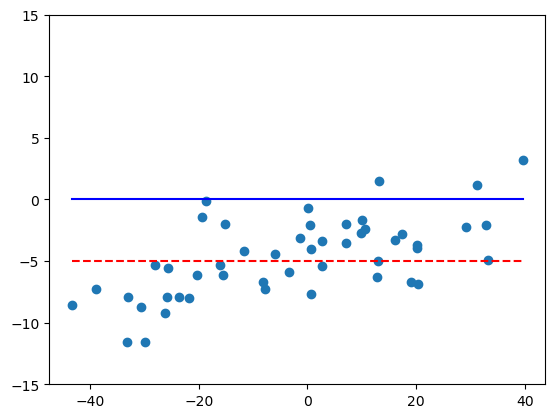

In [8]:
plt.plot(margin_sorted,diff,'o')
avg = diff.mean()
x = [margin_sorted[0],margin_sorted[len(states_sorted)-1]]
y = [avg,avg]
y2 = [0,0]
plt.ylim(-15,15)
plt.plot(x,y,'r--')
plt.plot(x,y2,'b-')

Coefficients (from curve_fit)
[-4.64860996  0.10758672]
Covariance Matrix (from curve_fit)
[[0.19410484 0.0013667 ]
 [0.0013667  0.00042547]]


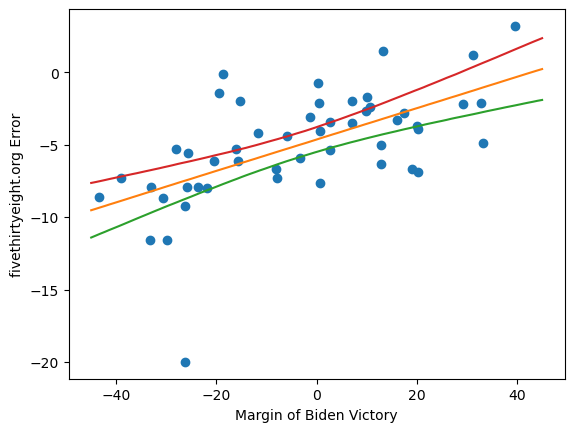

In [9]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = margin_sorted
y = diff
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(-45,45.0,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

plt.plot(margin_sorted,diff,'o')
plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.ylabel('fivethirtyeight.org Error')
plt.xlabel('Margin of Biden Victory')
plt.show()

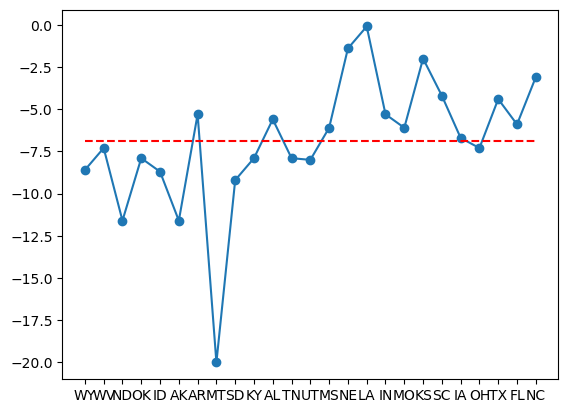

In [10]:
plt.plot(states_r,diff_r,'o-')
avg = np.array(diff_r).mean()
x = [states_r[0],states_r[len(states_r)-1]]
y = [avg,avg]
plt.plot(x,y,'r--')

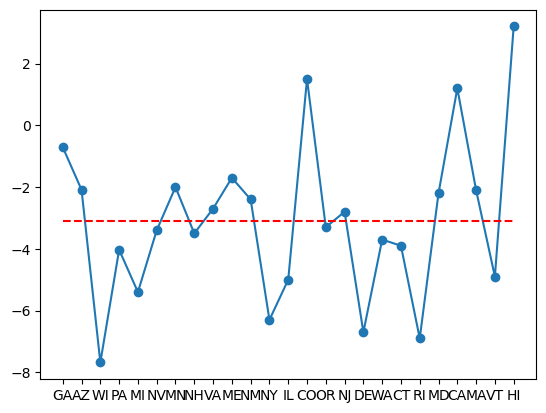

In [11]:
plt.plot(states_d,diff_d,'o-')
avg = np.array(diff_d).mean()
x = [states_d[0],states_d[len(states_d)-1]]
y = [avg,avg]
plt.plot(x,y,'r--')

<BarContainer object of 50 artists>

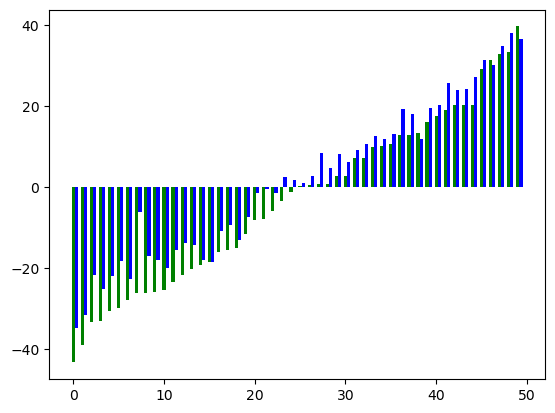

In [12]:
ind = np.arange(50) 
width = 0.35   

plt.bar(ind, margin_sorted, width, color='green')
plt.bar(ind+width, fte_margin, width, color='blue')